# 山河事件簿分析工具
riverlog_for_gis.py 需要在同一個目錄

文件請參閱:
https://docs.google.com/document/d/1iM_-YdZ8LFFbPkcL-4Irp9Z0laTXgUL2MzfwE4SWtFQ/edit#heading=h.lumlll4mf62a

In [186]:
from riverlog_for_gis import * 

# Get/Load Data
需要的時間範圍可以在此設定

In [ ]:
df_info = api_to_csv("reservoir-info",None)
filename=api_to_csv_range("2021-01-01","2021-06-06","reservoir-reservoirData",None,"ObservationTime")
dest_name="%s_GMT8.csv" %(filename[:-4])
df=csv_add_gmt8(filename,"ObservationTime", dest_name )

# Handle info

In [188]:
df_info=df_info[df_info['Year']==105]
df_info.drop_duplicates(subset="id")
df_info["id"] = pd.to_numeric(df_info["id"])

# Merge/Filter
需要的水庫可以在此設定

In [194]:
df2=df.merge(df_info, how='left', left_on='ReservoirIdentifier', right_on='id')
df2=df2.drop_duplicates(subset=["ObservationTime","ReservoirIdentifier"],keep='last')
df2=df2[df2['ReservoirIdentifier'].isin([10405,10201,10205])]

# Calculate, Pivot

In [195]:
df2["ObservationTimeGMT8"] = pd.to_datetime(df2['ObservationTimeGMT8'])
df2['percent']=df2['EffectiveWaterStorageCapacity']/df2['EffectiveCapacity']*100
df2=df2[df2['percent']<=100]
df3 = df2.pivot(index='ObservationTimeGMT8', columns='ReservoirName', values='percent')

# Plot

<IPython.core.display.Javascript object>


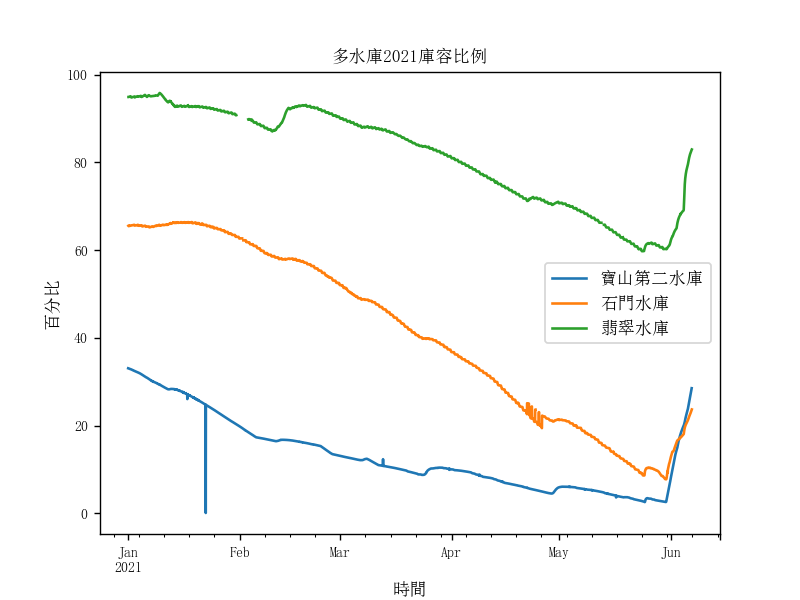

<function matplotlib.pyplot.show(block=None)>

In [196]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df3.plot()
plt.title("多水庫2021庫容比例",fontproperties=myfont) 
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=8)
plt.yticks(fontname = 'SimSun',size=8)
plt.xlabel('時間',fontproperties=myfont)
plt.ylabel('百分比',fontproperties=myfont)
plt.show

# DEBUG

In [117]:
#df=df.astype({'ReservoirIdentifier': object})
#df_info=df_info.astype({'id': int64})
#df3.dtypes

In [ ]:
#df2.plot.line(x=df2["ObservationTimeGMT8"],y='WaterLevel')
#df2.ObservationTimeGMT8 = pd.to_datetime(df2.ObservationTimeGMT8).dt.time
#df2.set_index('Time').plot()
df2["ObservationTimeGMT8"] = pd.to_datetime(df2['ObservationTimeGMT8'])
df2['percent']=df2['EffectiveWaterStorageCapacity']/3147.18*100
df2.plot(x="ObservationTimeGMT8", y=["percent"])
plt.show()

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df2.plot(x='ObservationTimeGMT8',y='WaterLevel') #line type have problem
#plt.title("排放量按主要都市分",fontproperties=myfont) 
#plt.xlabel('縣市',fontproperties=myfont)
#plt.ylabel('公噸',fontproperties=myfont)
#plt.legend(prop=myfont)
#plt.xticks(fontname = 'SimSun',size=8)
#plt.yticks(fontname = 'SimSun',size=8)
plt.show()